## Pymaceuticals Inc.

Top-level summary of the study results;

- 249 mice were used in the study of nine drug regimens, in addition to a placebo, for the potential treatment of squamous cell carcinoma tumor growth. Tumor volume of each mouse was measured over the 45 days of the study and data from 248 of these mice was statistically analysed.


- The performance of Capomulin versus the other treatment regimens in the study showed promise with Capomulin along with Ramicane having significantly lower final tumor volume when analysed and compared to Infubinol and Ceftamin, this can be seen in the box and whisker plots that were created.


- The Tumor volume of mouse I509, which was treated with the Capomulin regimen, after initially increasing in volume to 48.1mm3 in the first 20 days, reduced from a start volume of 45.0mm3 to 41.5mm3 at the conclusion of the study after 45 days. However it should be noted that metastatic cancer growth increased from 0 to 3 sites over the study period.


- As can be seen in the scatter plot and linear regression model of mice treated with the Capomulin regimen, the Capomulin treatment regimen was less effective for heavier mice. With an r-value of 0.84, the correlation between mouse weight and average tumor volume for Capomulin has a strong, positive, linear relationship.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID") 

# Display the data table in a preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice by counting the unique values
combined_data_df['Mouse ID'].nunique()

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse = duplicates_df.iloc[0]['Mouse ID']

print(f"The duplicate mouse Id is {duplicate_mouse}")

# Show dataframe of all the data for the duplicate mouse
duplicates_df

The duplicate mouse Id is g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']

# Show preview of dataframe
clean_combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_combined_data_df['Mouse ID'].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate statistics
mean = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
variance = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
std = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem = clean_combined_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# Create a dataframe to hold statistics
statistics_df = pd.DataFrame({'Mean':mean, 
                              'Median':median, 
                              'Variance':variance, 
                              'Standard Deviation':std, 
                              'SEM':sem})

statistics_df = statistics_df.rename(columns={"Mean":"Mean Tumor Volume", 
                                              "Median":"Median Tumor Volume",
                                              "Variance":"Tumor Volume Variance",
                                              "Standard Deviation":"Tumor Volume Std. Dev",
                                              "SEM":"Tumor Volume Std. Err."})

# Show dataframe
statistics_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = clean_combined_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":
                                                                            ["mean","median","var","std","sem"]})

# Show dataframe
summary_statistics_df

# This method produces everything in a single groupby function

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

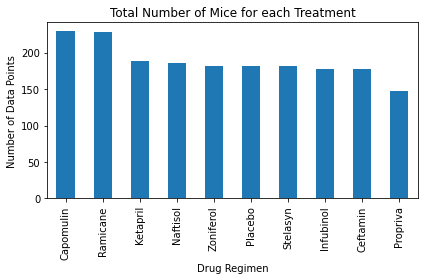

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Create bar plot
bar_plot = clean_combined_data_df['Drug Regimen'].value_counts().plot(kind='bar')

# Set main, x and y titles and format chart
plt.title('Total Number of Mice for each Treatment')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()

# Show bar plot
plt.show()

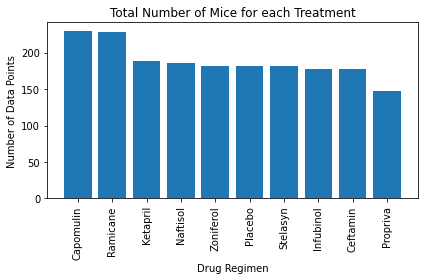

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set the x and y axis
y_axis = clean_combined_data_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(y_axis))

# Create bar plot
plt.bar(x_axis, y_axis)

# Allocate locations and labels for ticks on the x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values)

# Set main, x and y titles and format chart
plt.title('Total Number of Mice for each Treatment')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.tight_layout()

# Show bar plot
plt.show()

In [10]:
# Show the count of gender of mice for each Timepoint
sex_count = clean_combined_data_df['Sex'].value_counts()
sex_count

Male      958
Female    922
Name: Sex, dtype: int64

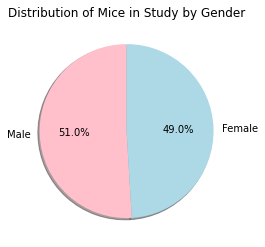

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Set colours for pie plot
colors = ["pink", "lightblue"]

#Create Pie Plot using pandas
pie_plot = sex_count.plot.pie(autopct="%1.1f%%", ylabel=(''), colors=colors, shadow=True, startangle=90, 
                              title='Distribution of Mice in Study by Gender')

# Show pie plot
plt.show()

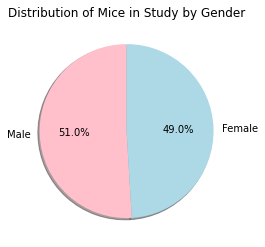

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set colours for pie plot
colors = ["pink", "lightblue"]
labels = sex_count.index

# Create pie plot using pyplot
plt.pie(sex_count, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)

# Set pie plot title
plt.title('Distribution of Mice in Study by Gender')

# Show pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_combined_data_df.groupby('Mouse ID')['Timepoint'].max())

# Show preview of dataframe
max_timepoint_df.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint_df, clean_combined_data_df, on=["Mouse ID", "Timepoint"], how="inner")
merged_df = merged_df.rename(columns={'Timepoint': 'Max Timepoint'})

# Show preview of dataframe
merged_df.head()

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_df = merged_df.loc[merged_df['Drug Regimen'] == regimen]  
    
    # add subset
    final_volume_df = regimen_df.loc[regimen_df['Max Timepoint'] == regimen_df['Max Timepoint']]
    
    # Create a series that appends all final volume values for each regimen into tumor_vol list
    final_vol = final_volume_df['Tumor Volume (mm3)']
    tumor_vol.append(final_vol)
    
    # Calculate the IQR for each drug regimen
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'The IQR for {regimen}: {iqr}')
    
    # Determine outliers using upper and lower bounds for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {regimen}: {lower_bound}')
    print(f'Upper Bound for {regimen}: {upper_bound}')
    
    # Check for and count outliers
    outliers = (final_vol.loc[(merged_df['Tumor Volume (mm3)'] >= upper_bound) | 
                              (merged_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of potential outliers in {regimen}: {outliers}')
    print(f"---------------------------------------------")

The IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of potential outliers in Capomulin: 0
---------------------------------------------
The IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of potential outliers in Ramicane: 0
---------------------------------------------
The IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of potential outliers in Infubinol: 1
---------------------------------------------
The IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of potential outliers in Ceftamin: 0
---------------------------------------------


In [16]:
# Identify Infubinol outlier

# Locate the rows which contain mice on Infubinol and get the final tumor volumes
Infubinol_df = merged_df.loc[merged_df['Drug Regimen'] == ('Infubinol')]  

# Create empty list to fill with Infubinol tumor vol data (for plotting)
infubinol_tumor_vol = []

# add subset
infubinol_final_volume_df = Infubinol_df.loc[Infubinol_df['Max Timepoint'] == Infubinol_df['Max Timepoint']]
    
# Create a series that appends all final volume values for Infubinol into tumor_vol list
infubinol_final_vol = infubinol_final_volume_df['Tumor Volume (mm3)']
infubinol_tumor_vol.append(infubinol_final_vol)
    
# Calculate the IQR for Infubinol
quartiles = infubinol_final_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
   
# Determine outliers using upper and lower bounds for Infubinol
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
# Check for and count outliers
outlier = (infubinol_final_vol.loc[(merged_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                  (merged_df['Tumor Volume (mm3)'] <= lower_bound)])

# outlier
index = list(outlier.index)
index = pd.DataFrame(index)

outlier_mouse_id = infubinol_final_volume_df.at[(index[0][0]),'Mouse ID']

print(f'The Mouse ID of the potential Infubinol outlier is: {outlier_mouse_id}')

The Mouse ID of the potential Infubinol outlier is: c326


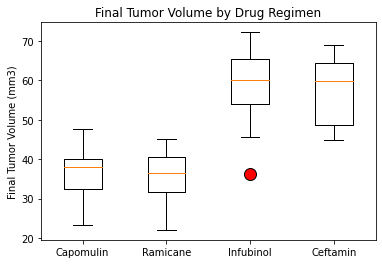

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Format the outlier
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, markeredgecolor='black')

# Create boxplot
plt.boxplot(tumor_vol, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], regimens)

# Show boxplot
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Select mouse I509 and retrieve its data within a dataframe
l509_df = clean_combined_data_df.loc[clean_combined_data_df['Mouse ID'] == ('l509')]  

# Show dataframe for mouse l509
l509_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


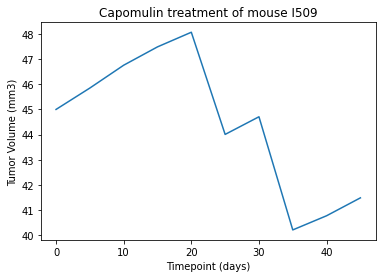

In [19]:
# Set the x and y axis of time point versus tumor volume for a mouse treated with Capomulin
x_axis = l509_df["Timepoint"]
y_axis = l509_df["Tumor Volume (mm3)"]

# Create line plot
plt.plot(x_axis, y_axis)

# Add title and labels to line plot
plt.title('Capomulin treatment of mouse I509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show line plot
plt.show()

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Create a dataframe with all Capomulin data
Capomulin_df = clean_combined_data_df.loc[clean_combined_data_df['Drug Regimen'] == ('Capomulin')]  

# Show preview of dataframe
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [21]:
# Create a dataframe with all mouse weight data
mouse_weight_df = Capomulin_df[['Mouse ID', 'Weight (g)']]

# Show preview of dataframe
mouse_weight_df.head()

,Mouse ID,Weight (g)
10,s185,17
11,s185,17
12,s185,17
13,s185,17
14,s185,17


In [22]:
# Create a dataframe with the average tumor volume for each mouse treated with Capomulin
average_volume_df = pd.DataFrame(Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

# Rename Tumor Volume column to Average Tumor Volume
average_volume_df = average_volume_df.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'}) 

# Show preview of dataframe
average_volume_df.head()

,Average Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344


In [23]:
# Merge mouse weight and average volume dataframes
merged_df = pd.merge(mouse_weight_df, average_volume_df, on=["Mouse ID"], how="inner")

# Show preview of dataframe
merged_df.head()

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,s185,17,34.559143
1,s185,17,34.559143
2,s185,17,34.559143
3,s185,17,34.559143
4,s185,17,34.559143


In [24]:
# Drop the duplicates in the merged dataframe
weight_ave_vol_df = merged_df[['Mouse ID', 'Weight (g)', 'Average Tumor Volume (mm3)']].drop_duplicates()

# Show preview of dataframe
weight_ave_vol_df.head()

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,s185,17,34.559143
10,x401,15,36.182040
20,m601,17,34.847470
30,f966,17,36.505973
35,u364,17,39.887495


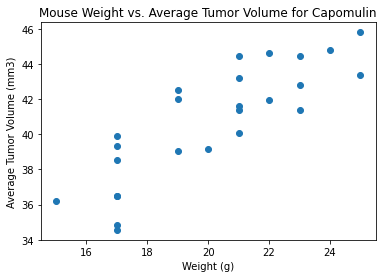

In [25]:
# Set x and y axis for scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axis = weight_ave_vol_df["Weight (g)"]
y_axis = weight_ave_vol_df["Average Tumor Volume (mm3)"]

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show scatter plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


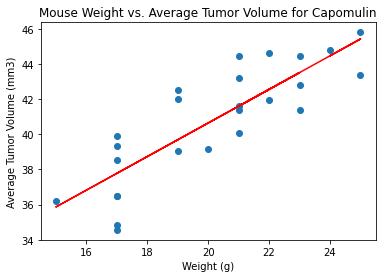

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_axis, y_axis)

# Add title and labels to line plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add the linear regression line to the scatter plot
plt.plot(x_axis,regress_values,"r-")

# Print out the r value
print(f"The correlation between mouse weight and the average tumor volume is {rvalue.round(decimals=2)}")

# Show scatter plot
plt.show()